Logistic Regression Coefficients: [[-0.93298386]] [-0.41186272]


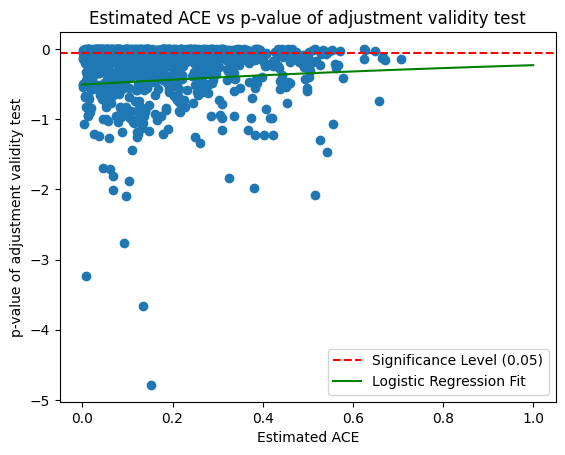

In [ ]:
import numpy as np
from causal_estimator import CausalEstimator
from graphs import generateDag
from indtests import check_adjustment_validity

np.random.seed(23)
n= 3000
vals = []
aces = []
for i in range(1000):
    df, za, zy, z, w = generateDag(n, 3, 100, "linear")
    causal_estimator = CausalEstimator('A', 'Y', z)
    ace = causal_estimator.run_estimation(df, "linear", 'covs', 'backdoor', covs = z)
    acc, rmse = causal_estimator.calculate_accuracy()
    adj = causal_estimator.adjustment_set
    res_Y = df['Y'] - causal_estimator.outcome_model.predict(df[causal_estimator.outcome_covs])
    pval = check_adjustment_validity(df, 'Y', adj, 'A', w, "linear", res_Y, tolerance_threshold = 5/np.sqrt(n))
    validity = 1 if pval < 0.05 else 0
    vals.append(pval)
    aces.append(ace)
# plot the aces vs vals, and plot liner regression line
# run a regression for aces against vals using scikit-learn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l1", solver="liblinear")
model.fit(np.abs(np.array(aces) - 1).reshape(-1, 1), np.array(vals) < 0.05)
print("Logistic Regression Coefficients:", model.coef_, model.intercept_)
# plot aces vs vals


import matplotlib.pyplot as plt
plt.scatter(np.abs(np.array(aces) - 1), np.log(1 - np.array(vals)))
plt.xlabel("Estimated ACE")
plt.ylabel("p-value of adjustment validity test")
plt.title("Estimated ACE vs p-value of adjustment validity test")
plt.axhline(y=np.log(1 - 0.05), color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
# add regression line
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = model.predict_proba(x)[:, 1]
plt.plot(x, np.log(1 - y), color='g', label='Logistic Regression Fit')
plt.legend()
plt.show()